# # Pymaceuticals Inc.
---

Main.ipynb by Ryan Cornelius 5/4/2023 for UMN data viz coursework. 


### Analysis

- This dataset contains tumor volumes for 248 unique mice (50.4% Male / 49.6% Female) were treated with 10 different drug regimens. Mean and median tumor volumes were calculated for each regimen and distribution values were provided. Most regimens showed tumor volumes averaging 52-55 mm3. Capomulin and Ramicane regimens showed decreased average tumor volumes with average volumes of approximately 40 mm3. Mice treated with these regimens were observed for longer timespans, indicating prolonged life. A linear decrease in tumor volume can be observed more these mice, as evidence by the line graph of mouse b128 provided. Both Ramican and Capomulin performed statistically similar, though Ramicane provided slightly lower median and mean tumor volumes. Capomulin interestingly had a slightly tighter inner quartile range. It also appeared that lower weight mice saw improved tumor weight reduction, with the correlation coefficient between the average tumor volume and mouse weight being 0.84 for mice treated with Capomulin, indiciating a strong correlation. 

 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Study_DF = pd.merge(study_results,mouse_metadata,how='left')

# Display the data table for preview
Study_DF.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
NumMice = len(Study_DF['Mouse ID'].unique())
MiceList = Study_DF['Mouse ID'].unique()
print(f'{NumMice}')

249


In [6]:
DuplicateList = []
# Our data should be uniquely identified by Mouse ID and Timepoint
for ID in MiceList:
    NumTotalEntries  = len( (Study_DF.loc[Study_DF['Mouse ID'] == ID])['Timepoint'] )
    NumUniqueEntries = len( (Study_DF.loc[Study_DF['Mouse ID'] == ID])['Timepoint'].unique())
        

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
    if NumTotalEntries != NumUniqueEntries:
        DuplicateList.append(ID)
        
DuplicateList

['g989']

In [8]:

DuplicateDF = pd.DataFrame()
# Optional: Get all the data for the duplicate mouse ID. 
for ID in DuplicateList:
    DF = Study_DF.loc[Study_DF['Mouse ID'] == ID,:]
    DuplicateDF = pd.concat([DuplicateDF,DF])
    
DupeIndexList = DuplicateDF.index.tolist()
DuplicateDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
StudyDFClean = Study_DF.drop(DupeIndexList)
StudyDFClean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
NumMice = len(StudyDFClean['Mouse ID'].unique())
NumMice

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
RegimenDF = StudyDFClean.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
MeanTumorVolDF = RegimenDF.mean()['Tumor Volume (mm3)']
MedTumorVolDF = RegimenDF.median()['Tumor Volume (mm3)']
VarTumorVolDF = RegimenDF.var()['Tumor Volume (mm3)']
StDevTumorVolDF = RegimenDF.std()['Tumor Volume (mm3)']
StErrTumorVolDF = RegimenDF.sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
SummaryData = {'Mean Tumor Volume':MeanTumorVolDF,'Median Tumor Volume' : MedTumorVolDF,
                                  'Tumor Volume Variance' : VarTumorVolDF,'Tumor Volume Std. Dev.' : StDevTumorVolDF,'Tumor Volume Std. Err.' : StErrTumorVolDF}
SummaryTumorVolDF = pd.DataFrame(data=SummaryData)
SummaryTumorVolDF

C:\Users\RyanD\AppData\Local\Temp\ipykernel_1932\100712195.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MeanTumorVolDF = RegimenDF.mean()['Tumor Volume (mm3)']
C:\Users\RyanD\AppData\Local\Temp\ipykernel_1932\100712195.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MedTumorVolDF = RegimenDF.median()['Tumor Volume (mm3)']
C:\Users\RyanD\AppData\Local\Temp\ipykernel_1932\100712195.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
SummaryTumorVolDF = RegimenDF['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
SummaryTumorVolDF

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

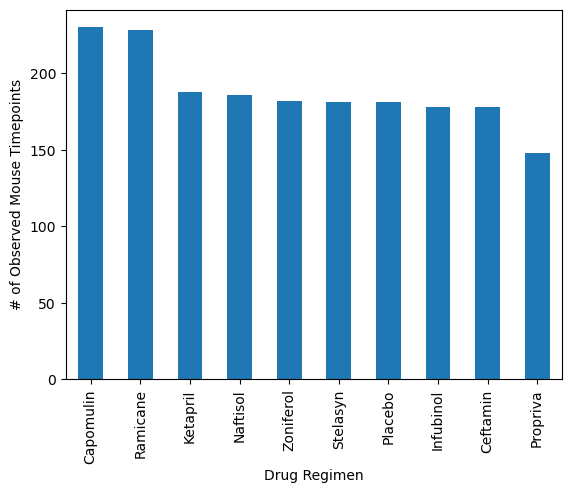

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
StudyDFClean['Drug Regimen'].value_counts().plot(kind='bar',xlabel = 'Drug Regimen',ylabel = '# of Observed Mouse Timepoints')
plt.show()

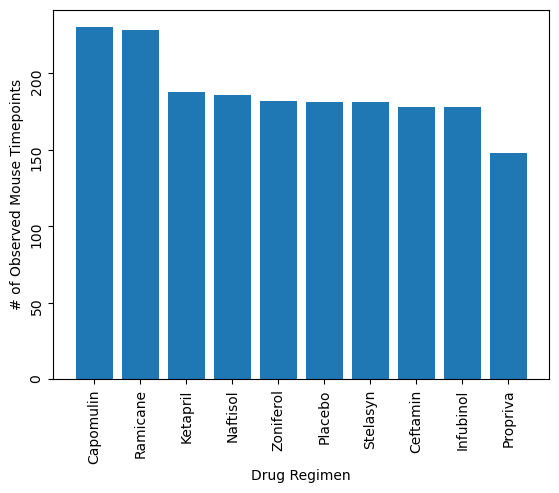

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
RegimenCountsDF = pd.DataFrame()
RegimenCountsDF['counts'] = RegimenDF['Drug Regimen'].value_counts()
RegimenCountsDF = RegimenCountsDF.droplevel(0)
RegimenCountsDF = RegimenCountsDF.sort_values(by='counts',ascending=False)


fig = plt.bar(RegimenCountsDF.index,RegimenCountsDF['counts'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tick_params(labelrotation=90)

plt.show()

<Axes: ylabel='Sex'>

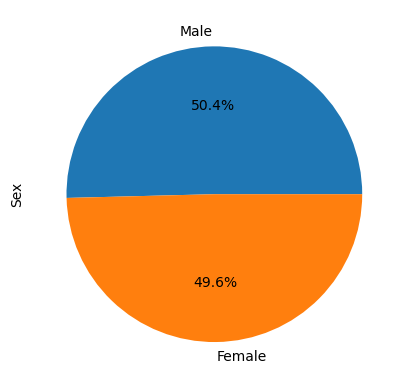

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Note: The starter code answer is incorrect. They appear to make a graph of male vs. female TIMEPOINTS, and not male vs. female MICE. 
MouseDF = StudyDFClean.groupby('Mouse ID').agg({'Sex':'first'})
MouseDF['Sex'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

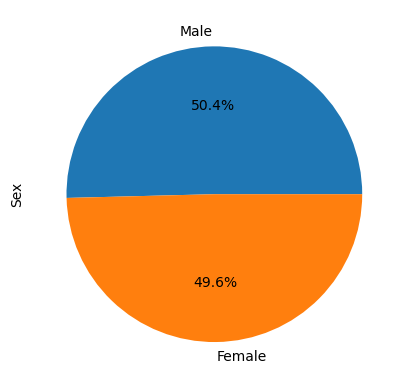

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig = plt.pie(MouseDF['Sex'].value_counts(),labels=['Male','Female'],autopct = '%1.1f%%')
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers, and Boxplots 

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
FinalTumorVolDF = StudyDFClean.groupby(['Drug Regimen','Mouse ID']).agg({'Tumor Volume (mm3)':'last'})
FinalTumorVolDF = FinalTumorVolDF.rename(columns={'Tumor Volume (mm3)' : 'Final Tumor Volume (mm3)'},errors='raise')
FinalTumorVolDF.reset_index(inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
FinalTumorVolDF_merge = StudyDFClean.merge(FinalTumorVolDF,how = 'inner',on='Mouse ID')


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
#RegimenList = StudyDFClean['Drug Regimen'].unique().tolist()
RegimenList = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
TumorVolDataList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for Regimen in RegimenList:
    DF = FinalTumorVolDF.loc[FinalTumorVolDF['Drug Regimen'] == Regimen]
    
    # add subset 
    quartiles = DF['Final Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    
    # Determine outliers using upper and lower bounds
    IQR = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5*IQR)
    upper_bound = quartiles[0.75] + (1.5*IQR)
    Outliers = DF.loc[(DF['Final Tumor Volume (mm3)'] < lower_bound) | (DF['Final Tumor Volume (mm3)'] > upper_bound),:]
    if len(Outliers) >= 1:
        print(f'{Regimen}\'s potential outliers: \n{Outliers}' )
    else:
        print(f'No outliers found for {Regimen}')

No outliers found for Capomulin
No outliers found for Ramicane
Infubinol's potential outliers: 
   Drug Regimen Mouse ID  Final Tumor Volume (mm3)
55    Infubinol     c326                 36.321346
No outliers found for Ceftamin


C:\Users\RyanD\AppData\Local\Temp\ipykernel_1932\1974243709.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for Regimen in RegimenList: PlotDF = PlotDF.append(FinalTumorVolDF.loc[( FinalTumorVolDF['Drug Regimen'] == Regimen)])
C:\Users\RyanD\AppData\Local\Temp\ipykernel_1932\1974243709.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for Regimen in RegimenList: PlotDF = PlotDF.append(FinalTumorVolDF.loc[( FinalTumorVolDF['Drug Regimen'] == Regimen)])
C:\Users\RyanD\AppData\Local\Temp\ipykernel_1932\1974243709.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for Regimen in RegimenList: PlotDF = PlotDF.append(FinalTumorVolDF.loc[( FinalTumorVolDF['Drug Regimen'] == Regimen)])
C:\Users\RyanD\AppData\Local\Temp\ipyker

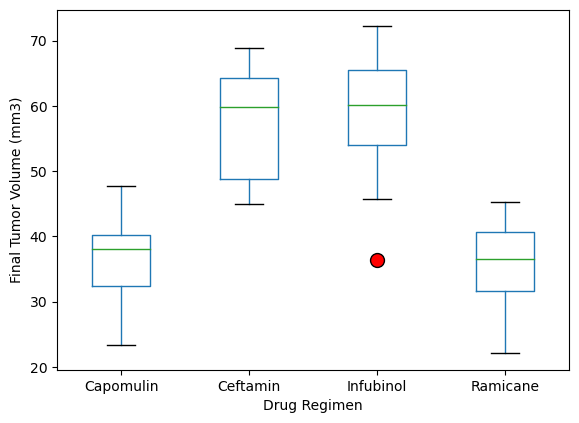

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
PlotDF = pd.DataFrame()
for Regimen in RegimenList: PlotDF = PlotDF.append(FinalTumorVolDF.loc[( FinalTumorVolDF['Drug Regimen'] == Regimen)])
ax = PlotDF.boxplot(column = 'Final Tumor Volume (mm3)', by = 'Drug Regimen', grid = False,
                     flierprops = dict(marker='o', markerfacecolor='red', markersize=10))
plt.suptitle('')
ax.set_title('')
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

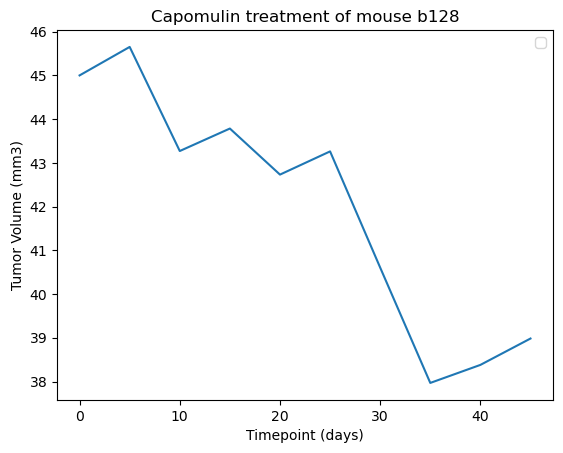

In [23]:
# In[17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
MouseSeries = StudyDFClean.loc[StudyDFClean['Mouse ID'] == 'b128']
MouseSeries.plot(kind= 'line',x = 'Timepoint',y='Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b128')
plt.legend('')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

C:\Users\RyanD\AppData\Local\Temp\ipykernel_1932\3796426534.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MouseSeries = StudyDFClean.loc[StudyDFClean['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()


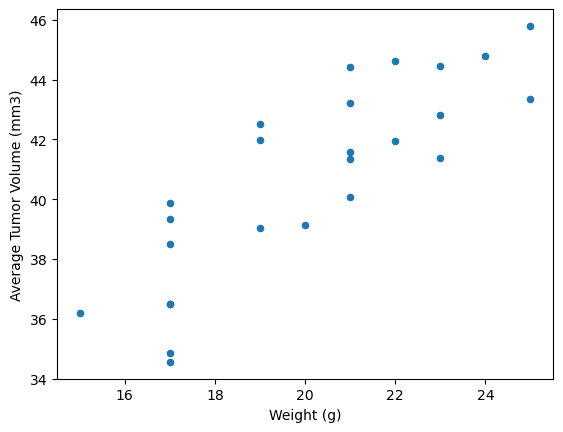

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
MouseSeries = StudyDFClean.loc[StudyDFClean['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()
MouseSeries.plot(kind= 'scatter',x = 'Weight (g)',y='Tumor Volume (mm3)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


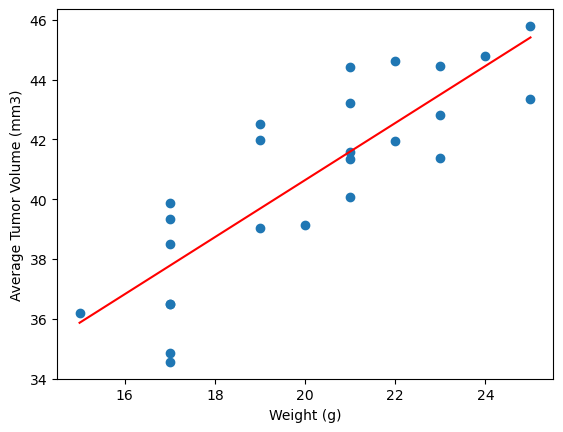

In [26]:

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = MouseSeries.corr()
correlation = correlation.loc['Weight (g)','Tumor Volume (mm3)']
print(f'The correlation between mouse weight and the average tumor volume is {correlation:.2f}')
linvals = st.linregress(MouseSeries['Weight (g)'],MouseSeries['Tumor Volume (mm3)'])
(slope, intercept) = (linvals[0], linvals[1])
xdata = np.linspace(15,25,len(MouseSeries['Weight (g)']))
fit = slope * xdata  + intercept

fig = plt.scatter(MouseSeries['Weight (g)'],MouseSeries['Tumor Volume (mm3)'])
plt.plot(xdata,fit,'-r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()